# FLIGHT DELAY PREDICTION USING ML ALGORITHMS

## Data Preprocessing

#### Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing Data

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/DATASET/flightdata (1).csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/DATASET/flightdata (1).csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

In [ ]:
data.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,0.0,2143,2102.0,-41.0,0.0,0,0,338,295.0,2182
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,0.0,1435,1439.0,4.0,0.0,0,0,110,115.0,528
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,0.0,1215,1142.0,-33.0,0.0,0,0,335,300.0,2182
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,0.0,1335,1345.0,10.0,0.0,0,0,196,205.0,1399
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,0.0,607,615.0,8.0,0.0,0,0,247,259.0,1927


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

### Droping unnecessary columns

In [ ]:
data1=data.drop(columns=["YEAR","ORIGIN_AIRPORT_ID","DEST_AIRPORT_ID"])

In [ ]:
data1.head()

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME.1,...,DEP_DEL15,CRS_ARR_TIME.1,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,ACTUAL_ELAPSED_TIME1,CRS_ELAPSED_TIME,DISTANCE
0,1,1,1,5,DL,N836DN,1399,ATL,SEA,1905,...,0.0,2143,21:02:00,-41.0,0.0,0,0,04:55:00,338,2182
1,1,1,1,5,DL,N964DN,1476,DTW,MSP,1345,...,0.0,1435,14:39:00,4.0,0.0,0,0,01:55:00,110,528
2,1,1,1,5,DL,N813DN,1597,ATL,SEA,940,...,0.0,1215,11:42:00,-33.0,0.0,0,0,05:00:00,335,2182
3,1,1,1,5,DL,N587NW,1768,SEA,MSP,819,...,0.0,1335,13:45:00,10.0,0.0,0,0,03:25:00,196,1399
4,1,1,1,5,DL,N836DN,1823,SEA,DTW,2300,...,0.0,607,06:15:00,8.0,0.0,0,0,04:19:00,247,1927


##### count no of values with respect to unique values of each columns

In [ ]:
for i in data1.columns:
    print(data1[i].value_counts())

3    3167
2    2777
4    2745
1    2542
Name: QUARTER, dtype: int64
8     1127
7     1078
6      979
9      962
10     955
5      916
12     899
11     891
3      885
4      882
1      860
2      797
Name: MONTH, dtype: int64
8     390
23    381
28    379
11    378
14    378
21    378
22    376
26    375
18    373
9     372
2     371
10    370
15    370
12    369
19    368
27    368
5     366
17    366
16    365
24    363
1     363
13    362
20    362
29    361
25    360
4     360
6     357
7     355
3     351
30    335
31    209
Name: DAY_OF_MONTH, dtype: int64
5    1668
1    1652
4    1637
3    1624
2    1607
7    1593
6    1450
Name: DAY_OF_WEEK, dtype: int64
DL    11231
Name: UNIQUE_CARRIER, dtype: int64
N857DZ    76
N856DN    75
N581NW    73
N582NW    72
N584NW    72
          ..
N906AT     1
N801NW     1
N612DL     1
N328NB     1
N301DN     1
Name: TAIL_NUM, Length: 789, dtype: int64
888     98
589     96
1991    96
588     95
902     94
        ..
2849     1
1531     1
1493     

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   QUARTER              11231 non-null  int64  
 1   MONTH                11231 non-null  int64  
 2   DAY_OF_MONTH         11231 non-null  int64  
 3   DAY_OF_WEEK          11231 non-null  int64  
 4   UNIQUE_CARRIER       11231 non-null  object 
 5   TAIL_NUM             11231 non-null  object 
 6   FL_NUM               11231 non-null  int64  
 7   ORIGIN               11231 non-null  object 
 8   DEST                 11231 non-null  object 
 9   CRS_DEP_TIME         11231 non-null  int64  
 10  DEP_TIME             11124 non-null  float64
 11  DEP_DELAY            11124 non-null  float64
 12  DEP_DEL15            11124 non-null  float64
 13  CRS_ARR_TIME         11231 non-null  int64  
 14  ARR_TIME             11116 non-null  float64
 15  ARR_DELAY            11043 non-null 

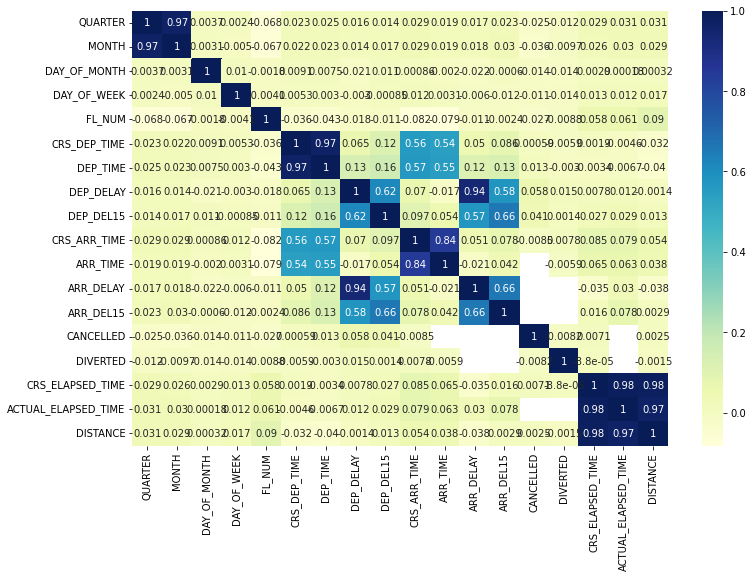

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data1.corr(),cmap="YlGnBu",annot=True)

## Data Cleaning
### Handling Null Values

In [ ]:
data1.isna().sum()

QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN                   0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

In [ ]:
data1.duplicated().sum()

0

In [ ]:
data1.iloc[179,:].isnull(),data1.iloc[179,:]

(QUARTER                False
 MONTH                  False
 DAY_OF_MONTH           False
 DAY_OF_WEEK            False
 UNIQUE_CARRIER         False
 TAIL_NUM               False
 FL_NUM                 False
 ORIGIN                 False
 DEST                   False
 CRS_DEP_TIME           False
 DEP_TIME                True
 DEP_DELAY               True
 DEP_DEL15               True
 CRS_ARR_TIME           False
 ARR_TIME                True
 ARR_DELAY               True
 ARR_DEL15               True
 CANCELLED              False
 DIVERTED               False
 CRS_ELAPSED_TIME       False
 ACTUAL_ELAPSED_TIME     True
 DISTANCE               False
 Name: 179, dtype: bool, QUARTER                     1
 MONTH                       1
 DAY_OF_MONTH               10
 DAY_OF_WEEK                 7
 UNIQUE_CARRIER             DL
 TAIL_NUM               N924DN
 FL_NUM                     86
 ORIGIN                    MSP
 DEST                      DTW
 CRS_DEP_TIME             1348
 DEP_T

data1["date"]=data1["DAY_OF_MONTH"].astype("str")+"/"+data1["MONTH"].astype("str")+'/'+data["YEAR"].astype("str")+" "+data1["CRS_DEP_TIME"].astype("str")

data1.date

data1["date"]=pd.to_datetime(data1["date"],format="%d/%m/%Y %H:%M:%S",errors='coerce')
data1["date"]

In [ ]:
data1[(data1["TAIL_NUM"]=="N924DN")&(data1["FL_NUM"]==86)]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,...,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
179,1,1,10,7,DL,N924DN,86,MSP,DTW,1348,...,NaN,1632,NaN,NaN,NaN,1,0,104,NaN,528


In [ ]:
data1[(data1["DEP_DEL15"]==0)&(data1["ARR_DEL15"]==1)]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,...,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
34,1,1,4,1,DL,N827DN,1770,SEA,MSP,1520,...,0.0,2032,2048.0,16.0,1.0,0,0,192,207.0,1399
128,1,1,7,4,DL,N931DN,744,MSP,ATL,1005,...,0.0,1334,1349.0,15.0,1.0,0,0,149,159.0,907
146,1,1,8,5,DL,N678DL,8,MSP,ATL,1732,...,0.0,2105,2133.0,28.0,1.0,0,0,153,178.0,907
166,1,1,8,5,DL,N711ZX,1473,SEA,JFK,1110,...,0.0,1930,1950.0,20.0,1.0,0,0,320,340.0,2422
167,1,1,8,5,DL,N824DN,1598,SEA,ATL,620,...,0.0,1401,1416.0,15.0,1.0,0,0,281,296.0,2182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11120,4,12,29,4,DL,N301DN,811,ATL,MSP,1350,...,0.0,1532,1552.0,20.0,1.0,0,0,162,185.0,907
11168,4,12,30,5,DL,N947DL,984,ATL,JFK,2055,...,0.0,2315,2330.0,15.0,1.0,0,0,140,157.0,760
11173,4,12,31,6,DL,N659DL,2610,ATL,MSP,725,...,0.0,900,921.0,21.0,1.0,0,0,155,168.0,907
11187,4,12,3,6,DL,N627DL,95,ATL,DTW,1235,...,0.0,1436,1500.0,24.0,1.0,0,0,121,131.0,594


In [ ]:
data1.describe()

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
count,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11124.000000,11124.000000,11124.000000,11231.000000,11116.000000,11043.000000,11043.000000,11231.000000,11231.000000,11231.000000,11043.000000,11231.000000
mean,2.544475,6.628973,15.790758,3.960199,1334.325617,1320.798326,1327.189410,8.460266,0.142844,1537.312795,1523.978499,-2.573123,0.124513,0.010150,0.006589,190.652124,179.661233,1161.031965
std,1.090701,3.354678,8.782056,1.995257,811.875227,490.737845,500.306462,36.762969,0.349930,502.512494,512.536041,39.232521,0.330181,0.100241,0.080908,78.386317,77.940399,643.683379
min,1.000000,1.000000,1.000000,1.000000,7.000000,10.000000,1.000000,-16.000000,0.000000,2.000000,1.000000,-67.000000,0.000000,0.000000,0.000000,93.000000,75.000000,509.000000
25%,2.000000,4.000000,8.000000,2.000000,624.000000,905.000000,905.000000,-3.000000,0.000000,1130.000000,1135.000000,-19.000000,0.000000,0.000000,0.000000,127.000000,117.000000,594.000000
50%,3.000000,7.000000,16.000000,4.000000,1267.000000,1320.000000,1324.000000,-1.000000,0.000000,1559.000000,1547.000000,-10.000000,0.000000,0.000000,0.000000,159.000000,149.000000,907.000000
75%,3.000000,9.000000,23.000000,6.000000,2032.000000,1735.000000,1739.000000,4.000000,0.000000,1952.000000,1945.000000,1.000000,0.000000,0.000000,0.000000,255.000000,236.000000,1927.000000
max,4.000000,12.000000,31.000000,7.000000,2853.000000,2359.000000,2400.000000,645.000000,1.000000,2359.000000,2400.000000,615.000000,1.000000,1.000000,1.000000,397.000000,428.000000,2422.000000


## EDA or Data Analysis

### Data Visualization

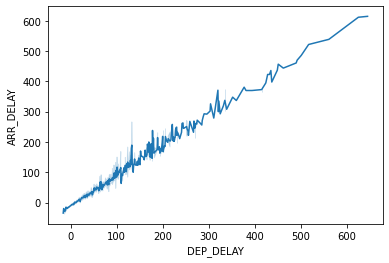

In [ ]:
sns.lineplot(x="DEP_DELAY",y="ARR_DELAY",data=data1)

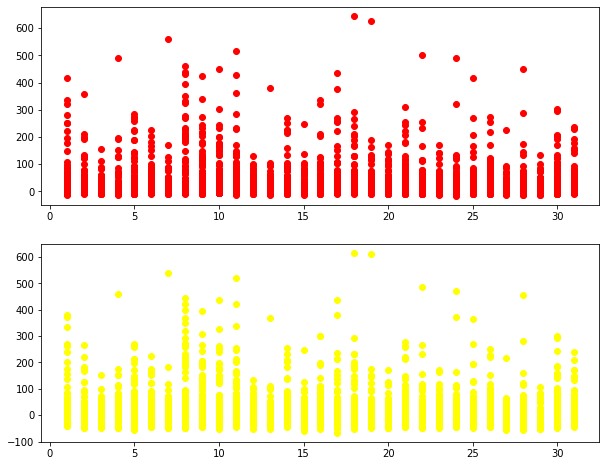

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.scatter(data1["DAY_OF_MONTH"],data1["DEP_DELAY"],color="red")
plt.subplot(2,1,2)
plt.scatter(data1["DAY_OF_MONTH"],data1["ARR_DELAY"],color="yellow")
plt.show()

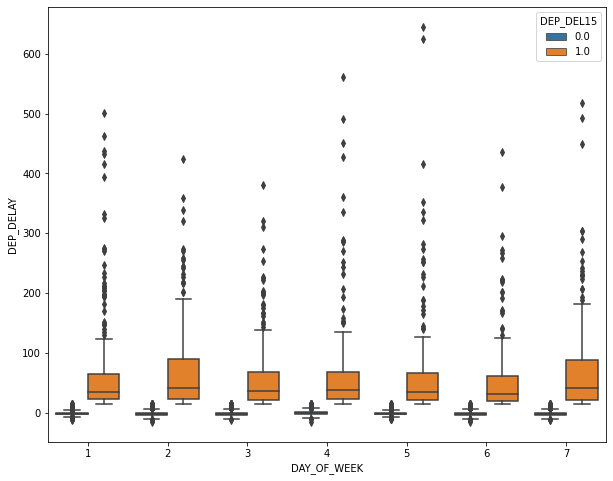

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x="DAY_OF_WEEK",y="DEP_DELAY",data=data1,hue="DEP_DEL15")

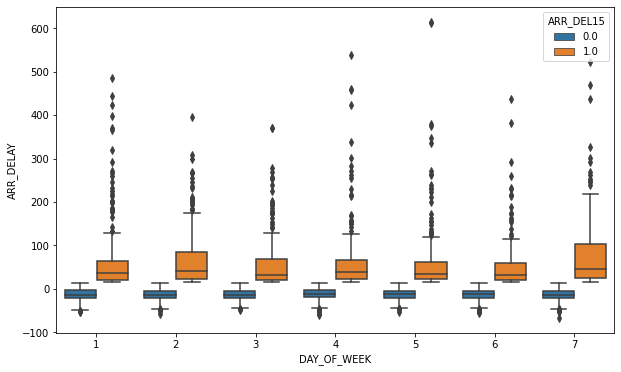

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="DAY_OF_WEEK",y="ARR_DELAY",data=data1,hue="ARR_DEL15")

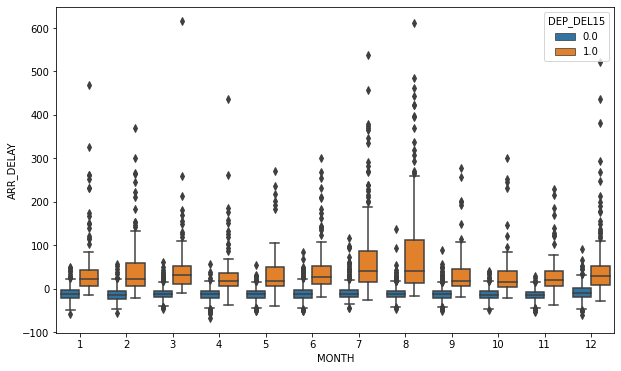

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="MONTH",y="ARR_DELAY",data=data1,hue="DEP_DEL15")

In [ ]:
data1.groupby(by="DAY_OF_WEEK")["DEP_DEL15"].sum()

DAY_OF_WEEK
1    253.0
2    213.0
3    204.0
4    245.0
5    250.0
6    198.0
7    226.0
Name: DEP_DEL15, dtype: float64

In [ ]:
data1.groupby(by="MONTH")["DEP_DEL15"].sum()

MONTH
1     113.0
2     115.0
3     104.0
4      96.0
5      86.0
6     168.0
7     219.0
8     246.0
9      88.0
10     86.0
11     66.0
12    202.0
Name: DEP_DEL15, dtype: float64

In [ ]:
data1[data1["ARR_DELAY"]>=300]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,...,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
202,1,1,10,7,DL,N125DL,1893,DTW,ATL,835,...,1.0,1049,1615.0,326.0,1.0,0,0,134,156.0,594
565,1,1,24,7,DL,N3753,463,JFK,ATL,1100,...,1.0,1337,2127.0,470.0,1.0,0,0,157,135.0,760
1199,1,2,16,2,DL,N935DL,86,MSP,DTW,1355,...,1.0,1640,2140.0,300.0,1.0,0,0,105,84.0,528
1605,1,2,24,3,DL,N983DL,1156,ATL,JFK,1740,...,1.0,2007,218.0,371.0,1.0,0,0,147,198.0,760
2535,1,3,18,5,DL,N809DN,2330,SEA,ATL,845,...,1.0,1631,246.0,615.0,1.0,0,0,286,256.0,2182
2723,2,4,10,7,DL,N624AG,1336,SEA,JFK,749,...,1.0,1600,2317.0,437.0,1.0,0,0,311,299.0,2422
4814,2,6,16,4,DL,N319NB,2816,JFK,MSP,1555,...,1.0,1817,2318.0,301.0,1.0,0,0,202,168.0,1029
5336,3,7,1,5,DL,N171DN,43,JFK,ATL,1525,...,1.0,1813,27.0,374.0,1.0,0,0,168,207.0,760
5340,3,7,1,5,DL,N355NB,2214,MSP,JFK,1735,...,1.0,2132,307.0,335.0,1.0,0,0,177,190.0,1029
5378,3,7,1,5,DL,N377NW,984,ATL,JFK,2115,...,1.0,2344,604.0,380.0,1.0,0,0,149,114.0,760


### Feature Engineering

In [ ]:
sm=[6,7,8]
wt=[9,10,11]
sp=[12,1,2,3]
fl=[4,5]

In [ ]:
data1["SEASON"]=np.where(data1["MONTH"].isin(sm),0,np.where(data1["MONTH"].isin(wt),1,np.where(data1["MONTH"].isin(sp),2,3)))

In [ ]:
data1["SEASON"].value_counts()

2    3441
0    3184
1    2808
3    1798
Name: SEASON, dtype: int64

### Encoding Catagorical cloumns to numerical

In [ ]:
data1["CANCELLED"]=np.where(data1["CANCELLED"]==1,4,0)

In [ ]:
data1["DIVERTED"]=np.where(data1["DIVERTED"]==1,3,0)

In [ ]:
data1.CANCELLED.unique(),data1.DIVERTED.unique()

(array([0, 4]), array([0, 3]))

In [ ]:
data1["DELAY_15"]=data1["ARR_DEL15"]+data1["DEP_DEL15"]
data1.DELAY_15.unique()

array([ 0.,  1.,  2., nan])

In [ ]:
data1["DELAY_15"].fillna(0,inplace=True)
data1.DELAY_15.unique()

array([0., 1., 2.])

### Feature Engineering

In [ ]:
data1["NDELAY"]=data1["DELAY_15"]+data1["CANCELLED"]+data1["DIVERTED"]

In [ ]:
data1.NDELAY.unique()

array([0., 1., 2., 3., 4.])

In [ ]:
len(data1["TAIL_NUM"].value_counts()),len(data1["FL_NUM"].value_counts())

(789, 690)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   QUARTER              11231 non-null  int64  
 1   MONTH                11231 non-null  int64  
 2   DAY_OF_MONTH         11231 non-null  int64  
 3   DAY_OF_WEEK          11231 non-null  int64  
 4   UNIQUE_CARRIER       11231 non-null  object 
 5   TAIL_NUM             11231 non-null  object 
 6   FL_NUM               11231 non-null  int64  
 7   ORIGIN               11231 non-null  object 
 8   DEST                 11231 non-null  object 
 9   CRS_DEP_TIME         11231 non-null  int64  
 10  DEP_TIME             11124 non-null  float64
 11  DEP_DELAY            11124 non-null  float64
 12  DEP_DEL15            11124 non-null  float64
 13  CRS_ARR_TIME         11231 non-null  int64  
 14  ARR_TIME             11116 non-null  float64
 15  ARR_DELAY            11043 non-null 

## Droping Unnecessary Columns

In [ ]:
clm=["UNIQUE_CARRIER","DEP_TIME","DEP_DELAY","DEP_DEL15","ARR_TIME","ARR_DELAY","ARR_DEL15","CANCELLED","DIVERTED","DELAY_15"]
data2=data1.drop(columns=clm)
data2.head()

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,TAIL_NUM,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,SEASON,NDELAY
0,1,1,1,5,N836DN,1399,ATL,SEA,1905,2143,338,295.0,2182,2,0.0
1,1,1,1,5,N964DN,1476,DTW,MSP,1345,1435,110,115.0,528,2,0.0
2,1,1,1,5,N813DN,1597,ATL,SEA,940,1215,335,300.0,2182,2,0.0
3,1,1,1,5,N587NW,1768,SEA,MSP,819,1335,196,205.0,1399,2,0.0
4,1,1,1,5,N836DN,1823,SEA,DTW,2300,607,247,259.0,1927,2,0.0


In [ ]:
data3=data2.drop(columns=["TAIL_NUM","FL_NUM"])

In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   QUARTER              11231 non-null  int64  
 1   MONTH                11231 non-null  int64  
 2   DAY_OF_MONTH         11231 non-null  int64  
 3   DAY_OF_WEEK          11231 non-null  int64  
 4   ORIGIN               11231 non-null  object 
 5   DEST                 11231 non-null  object 
 6   CRS_DEP_TIME         11231 non-null  int64  
 7   CRS_ARR_TIME         11231 non-null  int64  
 8   CRS_ELAPSED_TIME     11231 non-null  int64  
 9   ACTUAL_ELAPSED_TIME  11043 non-null  float64
 10  DISTANCE             11231 non-null  int64  
 11  SEASON               11231 non-null  int64  
 12  NDELAY               11231 non-null  float64
dtypes: float64(2), int64(9), object(2)
memory usage: 1.1+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd95523d590>,
      dtype=object)

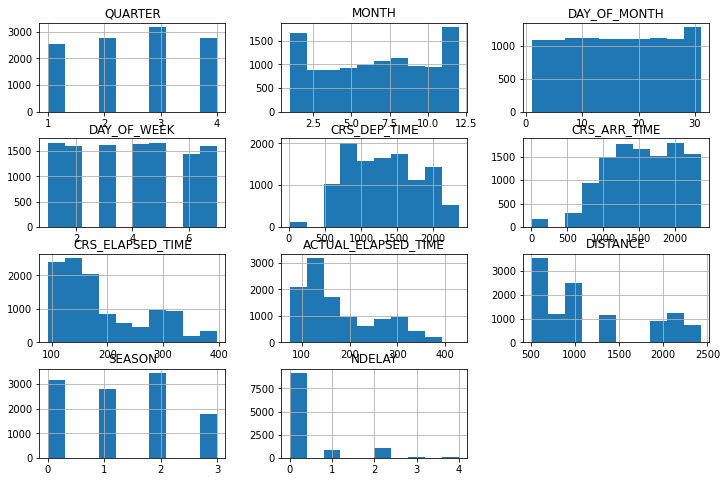

In [ ]:
data3.hist(figsize=(12,8))

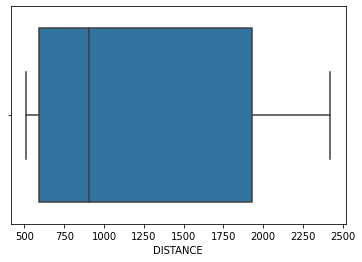

In [ ]:
sns.boxplot(x='DISTANCE',data=data3)

In [ ]:
data3.NDELAY.value_counts()

0.0    9130
2.0    1035
1.0     878
4.0     114
3.0      74
Name: NDELAY, dtype: int64

## Spliting Dependent and Independent Variables

In [ ]:
x=data2.drop(columns=["NDELAY","TAIL_NUM"])
y=data2.NDELAY

### Encoding Categorical cloumns to numerical

In [ ]:
x["ORIGIN"].replace({"ATL":1,'DTW':2,'JFK':3,'MSP':4,'SEA':5},inplace=True)
x["DEST"].replace({"ATL":1,'DTW':2,'JFK':3,'MSP':4,'SEA':5},inplace=True)

## Balancing Dataset Using SMOTE Technique

## Splitting Dataset as Training and Testing data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape,x_test.shape

((8984, 13), (2247, 13))

In [ ]:
x_train.isna().sum()

QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
FL_NUM                   0
ORIGIN                   0
DEST                     0
CRS_DEP_TIME             0
CRS_ARR_TIME             0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    157
DISTANCE                 0
SEASON                   0
dtype: int64

In [ ]:
x_train1=x_train.drop(columns=["ACTUAL_ELAPSED_TIME"])

In [ ]:
x_train1.isna().sum()

QUARTER             0
MONTH               0
DAY_OF_MONTH        0
DAY_OF_WEEK         0
FL_NUM              0
ORIGIN              0
DEST                0
CRS_DEP_TIME        0
CRS_ARR_TIME        0
CRS_ELAPSED_TIME    0
DISTANCE            0
SEASON              0
dtype: int64

In [ ]:
y_train.isna().sum()

0

In [ ]:
x_test.isna().sum()

QUARTER                 0
MONTH                   0
DAY_OF_MONTH            0
DAY_OF_WEEK             0
FL_NUM                  0
ORIGIN                  0
DEST                    0
CRS_DEP_TIME            0
CRS_ARR_TIME            0
CRS_ELAPSED_TIME        0
ACTUAL_ELAPSED_TIME    31
DISTANCE                0
SEASON                  0
dtype: int64

In [ ]:
x_test1=x_test.drop(columns=["ACTUAL_ELAPSED_TIME"])

In [ ]:
x_test1.isna().sum()

QUARTER             0
MONTH               0
DAY_OF_MONTH        0
DAY_OF_WEEK         0
FL_NUM              0
ORIGIN              0
DEST                0
CRS_DEP_TIME        0
CRS_ARR_TIME        0
CRS_ELAPSED_TIME    0
DISTANCE            0
SEASON              0
dtype: int64

# Model Building

### DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(x_train1,y_train)
dc.score(x_test1,y_test)

0.6875834445927904

### RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50,random_state=42)
rf.fit(x_train1,y_train)
rf.score(x_test1,y_test)

0.7903871829105474

In [ ]:
pd.DataFrame(rf.predict(x_test1)).value_counts()

0.0    2121
2.0      70
1.0      50
4.0       4
3.0       2
dtype: int64

In [ ]:
x_test1.iloc[[99,88,22],:]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,CRS_ELAPSED_TIME,DISTANCE,SEASON
4352,2,6,1,3,785,4,1,1300,1635,155,907,0
4572,2,6,9,4,449,3,4,805,1020,195,1029,0
10568,4,12,5,1,1130,2,1,1910,2114,124,594,2


In [ ]:
y_test.iloc[[8,21,912]]

6392    0.0
9940    0.0
3883    0.0
Name: NDELAY, dtype: float64

In [ ]:
rf.predict(x_test1.iloc[[8,21,912],:])

array([0., 0., 0.])

In [ ]:
pd.DataFrame(dc.predict(x_test1)).value_counts()

0.0    1762
1.0     223
2.0     217
3.0      23
4.0      22
dtype: int64

### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr1=LogisticRegression(solver='sag')
lr1.fit(x_train1,y_train)
lr1.score(x_test1,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


0.8099688473520249

In [ ]:
lr1.predict(x_test1).sum()

0.0

### SVM

In [ ]:
from sklearn.svm import SVC
svm=SVC(kernel='sigmoid')
svm.fit(x_train1,y_train)
svm.score(x_test1,y_test)

0.7601246105919003

In [ ]:
pd.DataFrame(svm.predict(x_test1)).value_counts()

0.0    2089
2.0     158
dtype: int64

In [ ]:
pd.DataFrame(y_test).value_counts()

NDELAY
0.0       1820
2.0        220
1.0        176
4.0         22
3.0          9
dtype: int64

### KNearestNeighborsClassifie

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train1,y_train)
knn.score(x_test1,y_test)

0.7939474855362706

In [ ]:
pd.DataFrame(knn.predict(x_test1)).value_counts()

0.0    2166
2.0      48
1.0      33
dtype: int64

In [ ]:
knn.predict(x_test1.iloc[[8,21,912],:])

array([0., 0., 0.])

##### we evalute only Random Forest and Decision Tree bacause other models are less accuracy and not predicting correctly

## Evaluation Of Random Forest

Testing Sensitivity for Random Forest 0.9169732002101945
Testing Specificity for Random Forest 0.23255813953488372
Testing Precision for Random Forest 0.9814398200224972
Testing accuracy for Random Forest 0.7903871829105474


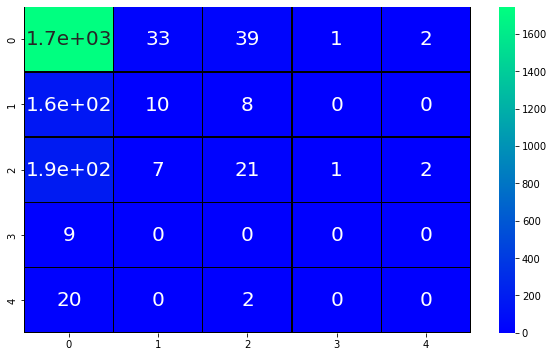

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
pred=rf.predict(x_test1)
cm=confusion_matrix(y_test, pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
#print(round(accuracy_score(prediction3,y_test)*100,2))
#print('Testing Accuracy for knn',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest',(TP/(TP+FN)))
print('Testing Specificity for Random Forest',(TN/(TN+FP)))
print('Testing Precision for Random Forest',(TP/(TP+FP)))
print('Testing accuracy for Random Forest',accuracy_score(y_test, pred))

In [ ]:
print(classification_report(y_test,pred))#RandomForest

              precision    recall  f1-score   support

         0.0       0.82      0.96      0.89      1820
         1.0       0.20      0.06      0.09       176
         2.0       0.30      0.10      0.14       220
         3.0       0.00      0.00      0.00         9
         4.0       0.00      0.00      0.00        22

    accuracy                           0.79      2247
   macro avg       0.26      0.22      0.22      2247
weighted avg       0.71      0.79      0.74      2247



## Evaluation Of Decission Tree

Testing Accuracy for Decision Tree 0.8320355951056729
Testing Sensitivity for Decision Tree 0.9201497192763568
Testing Specificity for Decision Tree 0.1076923076923077
Testing Precision for Decision Tree 0.8944815039417829
Testing accuracy for Decision Tree 0.6875834445927904


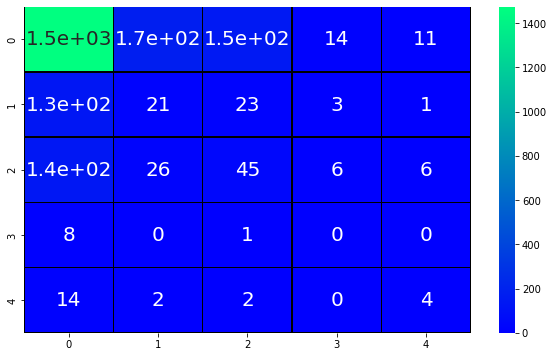

In [ ]:
pred1=dc.predict(x_test1)
cm1=confusion_matrix(y_test, pred1)
plt.figure(figsize=(10,6))
sns.heatmap(cm1, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm1[0][0]
TN=cm1[1][1]
FN=cm1[1][0]
FP=cm1[0][1]
#print(round(accuracy_score(prediction3,y_test)*100,2))
print('Testing Accuracy for Decision Tree',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Decision Tree',(TP/(TP+FN)))
print('Testing Specificity for Decision Tree',(TN/(TN+FP)))
print('Testing Precision for Decision Tree',(TP/(TP+FP)))
print('Testing accuracy for Decision Tree',accuracy_score(y_test, pred1))

In [ ]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

         0.0       0.84      0.81      0.82      1820
         1.0       0.09      0.12      0.11       176
         2.0       0.21      0.20      0.21       220
         3.0       0.00      0.00      0.00         9
         4.0       0.18      0.18      0.18        22

    accuracy                           0.69      2247
   macro avg       0.26      0.26      0.26      2247
weighted avg       0.71      0.69      0.70      2247



In [ ]:
import pickle

In [ ]:
pickle.dump(dc,open("dcmodel.pkl",'wb'))